<p>
  <center><img src="../assets/thakaa_logo.png" width="500" height="300"></center>
</p>

<p>
<br>
  <center><img src="../assets/artwork.png" width="600" height="300"></center>
</p>
<br>
<h1 style='text-align: center;'>سلسلة معسكرات ذكاء: المعسكر الثالث | إطلاق و إدارة نماذج تعلم الآلة</h1>
<!-- <font size="+2" style='text-align: center;'> تعلّم كيف تكتشف البيانات وتطوّر نماذج تعلّم الآلة </h2> -->
<div style="text-align: center; font-family: Arial; font-size: 1.5em;">تعرّف على أحدث الأساليب والممارسات لنشر نماذج تعلّم الآلة وإطلاقها</div>

<h2 style="text-align: left;"> 📚 استيراد المكتبات</h2>

In [1]:
from pathlib import Path
import pandas as pd
import numpy as np

from pathlib import Path
from typing import List, Dict, Tuple

from sklearn.preprocessing import MinMaxScaler
from sklearn.impute import SimpleImputer
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier

import joblib

from sklearn.pipeline import Pipeline

<h2 style="text-align: left;">🚗 تحميل وتجهيز البيانات</h2>

In [2]:
data_folder_path = "../data/"
data_file_name = "UsedCarsSA_Unclean_EN.csv"
data_set_path = Path(data_folder_path, data_file_name)
df = pd.read_csv(data_set_path, delimiter=",", header=0, index_col=False, na_values="na", usecols=['Mileage', 'Year', 'Price'])
df = df[df['Price'] != 'Negotiable']
df['Price'] = df['Price'].apply(int)
df["class"] = df["Price"] > 50000
df.drop(columns="Price", inplace=True)
df["class"] = df["class"].replace([False,True],[0,1])

df.head()

,Year,Mileage,class
0,2018,103000,1
2,2019,72418,0
3,2019,114154,0
4,2019,41912,1
5,2018,39000,1


<h2 style="text-align: left;">🔪 تقسيم البيانات إلى جزء للتدريب وآخر للتقييم</h2>

In [3]:
train_test_split_frac = 0.8
random_seed_fix = 47
np.random.seed(random_seed_fix)
msk = np.random.rand(len(df)) < train_test_split_frac

df["flag_train"] = 0
df.loc[msk, "flag_train"] = 1

train_df = df[(df["flag_train"] == 1)].drop(["flag_train"], axis=1).copy()
test_df = df[(df["flag_train"] == 0)].drop(["flag_train"], axis=1).copy()

In [4]:
len(train_df)

4473

In [5]:
len(test_df)

1179

## Scikit-learn Pipelines 

### Component#1: Data Imputation

https://scikit-learn.org/stable/modules/generated/sklearn.impute.SimpleImputer.html

In [6]:
imputer = SimpleImputer(missing_values=np.NaN, strategy='median')

### Component#2: Data Scalling

https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.MinMaxScaler.html

In [7]:
scaler = MinMaxScaler()

### Component#3: Calssifier

https://scikit-learn.org/stable/supervised_learning.html#supervised-learning

In [8]:
classifier = DecisionTreeClassifier(max_depth=10, random_state=42)

### Constructing and training the pipeline

https://scikit-learn.org/stable/modules/generated/sklearn.pipeline.Pipeline.html


*Hint: * --- 

In [9]:
def train_pipeline(df):
    estimators = [("imputer", imputer), # None
                  ("scaler", scaler),
                  ("model", classifier)]

    pipeline = Pipeline(estimators)  # None
    feature_columns = df.columns.values[df.columns.values != "class"]
    pipeline.fit(df[feature_columns], df["class"])

    return pipeline, feature_columns

pipeline, feature_columns = train_pipeline(train_df)

### Saving the pipeline

In [10]:
def save_pipeline(folder_path, pipeline, feature_columns):
    # Dump .... 
    # save the pipeline
    pipeline_name = "pipeline.pkl" # TODO: change it to .pkl
    pipeline_path = Path(folder_path, pipeline_name)
    ## Enter the line that dumps/saves the pipeline, hint:use the function joblib
    # Change it to pickle.
    
    # Write a command that saves the pipeline using joblib package
    # Hint: Look for the function "dump()"
    joblib.dump(pipeline, pipeline_path) # None

    # save the feature_columns
    cols_name = "pipeline_cols.pkl"
    cols_path = Path(folder_path, cols_name)
    joblib.dump(feature_columns, cols_path) # None
    
output_path = Path("../pipeline-output")
output_path.mkdir(parents=True, exist_ok=True)

save_pipeline(output_path, pipeline, feature_columns)

In [11]:
## TODO: Assertion command to check that the saving was done successuflly


### Loading the pipeline

In [12]:
def load_pipeline(folder_path):
    # load the pipeline
    #### Write a line that loads the model ..
    model_name = "pipeline.pkl"
    model_path = Path(folder_path, model_name)
    model = joblib.load(model_path)

    # Write a command that loads the pipeline using joblib package
    # Hint: Look for the function "joblib.load()"
    # load the feature_columns
    cols_name = "pipeline_cols.pkl"
    cols_path = Path(folder_path, cols_name)
    feature_columns = joblib.load(cols_path)

    return pipeline, feature_columns

# Load the model, the scaler, the imputer and the names of the columns from files:
pipeline, feature_columns = load_pipeline(output_path)

In [13]:
## TODO: Assertion command to check that the saving was done successuflly


### Do predictions using the trained pipeline

In [14]:
def predict_pipeline(test_df, pipeline, feature_columns):
    # Compute predictions using the trained pipeline
    # Write a line that predicts the y values for the test data using the pipeline
    # Hint: Look for method that predicts and use the feature_columns saved to restrict the used features.
    y_hat = pipeline.predict(test_df[feature_columns]) # None

    return y_hat

# Use the loaded model and other logic to get predictions for test-data in `test_df`:
pipeline_y_hat = predict_pipeline(test_df, pipeline, feature_columns)
pipeline_y_hat

array([0, 1, 1, ..., 1, 1, 0])

## 5. ONNX (Extra)

That was fun, but probably not that useful to any of you. However we added it to highlight two things. Firstly, the fact that you can move away from Python to deliver the model, while still developing it in Python. And secondly, or probably most imporantly, that the code and the weights are inextricably linked!

So while that was one lesser used method, let's go through the most predominant method for making model artifacts from Python to any platform you want. This is ONNX - Open Neural Network eXchange, and as the name suggests it was developed as an open standard for sharing neural networks. However, it now supports traditional ML models, like the ones we have been making in this course.

We will need to use the `skl2onnx` library. There are two ways to convert the model. A first method `convert_sklearn` which is a comprehensive way of converting. A second `to_onnx` which is calls `convert_sklearn`, but with simplified parameters and allows the option to infer the information from the training data. We won't show `to_onnx`, you can do that yourself.

To start with we will use `convert_sklearn`, and as such we need to think about the datatype that we will be inputting. Lets have a look at what goes into the pipeline:

In [15]:
onnx_df = train_df.copy()

onnx_df[onnx_df.columns] = onnx_df[onnx_df.columns].apply(pd.to_numeric, errors='coerce')

onnx_feature_columns = onnx_df.columns.values[onnx_df.columns.values != "class"]

onnx_df.iloc[0].values

array([  2018, 103000,      1])

We can check the type using numpy's `dtype`:

In [16]:
onnx_df.iloc[0].values.dtype

dtype('int64')

In [17]:
print(onnx_df.iloc[0].shape)

(3,)


In [18]:
onnx_df

,Year,Mileage,class
0,2018,103000,1
3,2019,114154,0
4,2019,41912,1
5,2018,39000,1
6,2011,183000,1
...,...,...,...
8240,2013,277000,0
8241,2012,147000,0
8242,2006,257000,0
8246,2011,18500,0


And will get it to be a `float64` type. Okay! We know enough to start up. Lets import the libraries we need.

In [20]:
from skl2onnx import convert_sklearn
from skl2onnx.common.data_types import FloatTensorType

The `initial_types` variable might take some getting used to. Assume that the specified scikit-learn model takes an input where the first 10 elements are floats and the last 100 elements are integers. For `convert_sklearn` we need to specify initial types. These mean importing `FloatTensorType` and `Int64TensorType` for the two different types:

```Python
from skl2onnx.common.data_types import FloatTensorType, Int64TensorType
```

We can then define the `initial_type` as a python list, where each element is a tuple of a variable name and a type 

```Python
initial_type = [('float_input', FloatTensorType([None, 10])),
                ('int64_input', Int64TensorType([None, 100]))]
```

The `[None]` in `[None, 10]` indicates the batch size here is unknown. For our model it is super easy. The type is `Float` and they are all of that type, so its size is 170 (171 columns including the class).

Lets convert the model now then:

In [21]:
initial_type = [('float_input', FloatTensorType([None, 2]))]

# Convert the model pipeline to ONNX. 
# The `pipeline` object is the same as before - so make sure you've run that code earlier in the notebook.
onnx = convert_sklearn(pipeline, initial_types=initial_type)

In [22]:
onnx.graph.node

[input: "float_input"
output: "variable"
name: "Imputer"
op_type: "Imputer"
attribute {
  name: "imputed_value_floats"
  floats: 2016.0
  floats: 100000.0
  type: FLOATS
}
attribute {
  name: "replaced_value_float"
  f: nan
  type: FLOAT
}
domain: "ai.onnx.ml"
, input: "variable"
output: "Ca_output0"
name: "Ca_Cast"
op_type: "Cast"
attribute {
  name: "to"
  i: 1
  type: INT
}
domain: ""
, input: "Ca_output0"
input: "Mu_Mulcst"
output: "Mu_C0"
name: "Mu_Mul"
op_type: "Mul"
domain: ""
, input: "Mu_C0"
input: "Ad_Addcst"
output: "variable1"
name: "Ad_Add"
op_type: "Add"
domain: ""
, input: "variable1"
output: "label"
output: "probabilities"
name: "TreeEnsembleClassifier"
op_type: "TreeEnsembleClassifier"
attribute {
  name: "class_ids"
  ints: 0
  ints: 0
  ints: 0
  ints: 0
  ints: 0
  ints: 0
  ints: 0
  ints: 0
  ints: 0
  ints: 0
  ints: 0
  ints: 0
  ints: 0
  ints: 0
  ints: 0
  ints: 0
  ints: 0
  ints: 0
  ints: 0
  ints: 0
  ints: 0
  ints: 0
  ints: 0
  ints: 0
  ints: 0
  ints

In [23]:
# Print only the first few characters, since the output is really long..
print(str(onnx)[:500])

ir_version: 8
producer_name: "skl2onnx"
producer_version: "1.13"
domain: "ai.onnx"
model_version: 0
doc_string: ""
graph {
  node {
    input: "float_input"
    output: "variable"
    name: "Imputer"
    op_type: "Imputer"
    attribute {
      name: "imputed_value_floats"
      floats: 2016.0
      floats: 100000.0
      type: FLOATS
    }
    attribute {
      name: "replaced_value_float"
      f: nan
      type: FLOAT
    }
    domain: "ai.onnx.ml"
  }
  node {
    input: "variable"
    outpu


Have a look above and see the model format. Its kind of readible. You can also plot it as a graph!

In [24]:
from onnx.tools.net_drawer import GetPydotGraph, GetOpNodeProducer
import os
import matplotlib.pyplot as plt

%matplotlib inline

In [25]:
pydot_graph = GetPydotGraph(onnx.graph,
                            name=onnx.graph.name,
                            rankdir="TB",
                            node_producer=GetOpNodeProducer(
                                "docstring", color="yellow",
                                fillcolor="yellow", style="filled"))

pydot_graph.write_dot("pipeline_onnx.dot")

os.system('dot -O -Gdpi=300 -Tpng pipeline_onnx.dot')

0

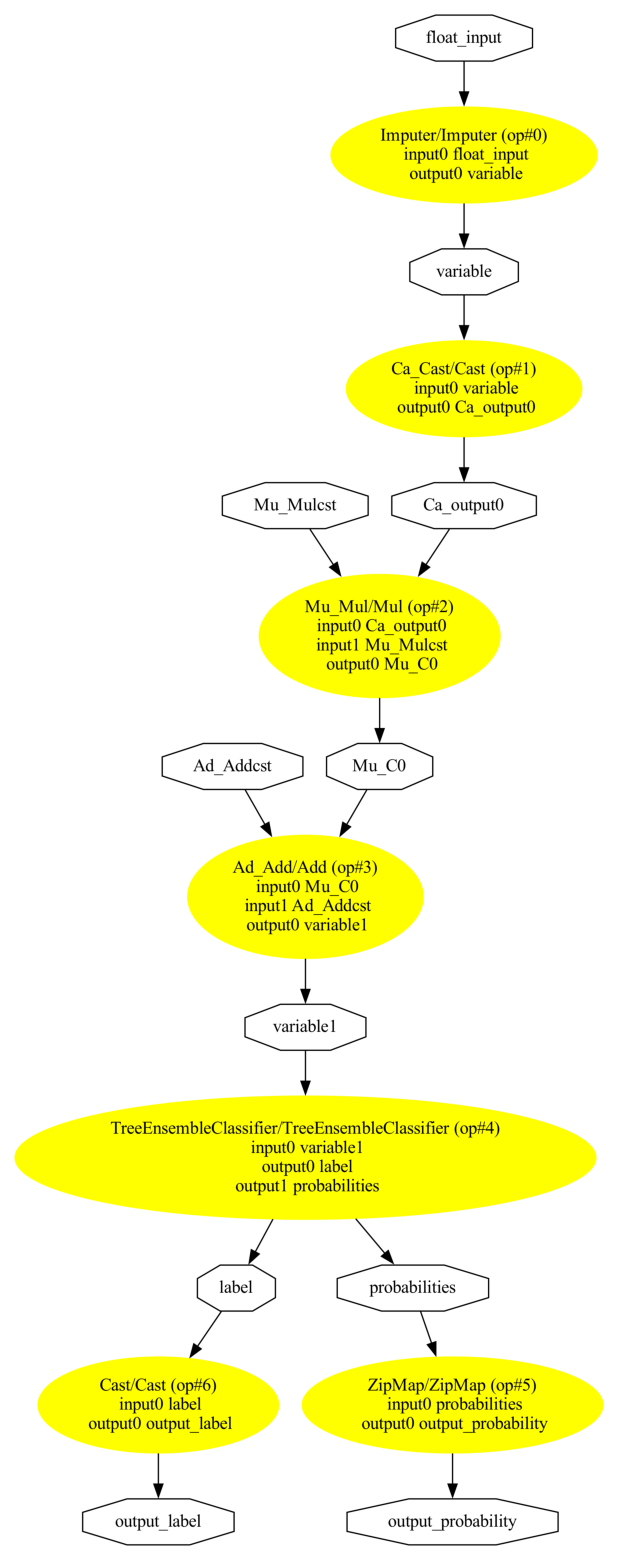

In [26]:
image = plt.imread("pipeline_onnx.dot.png")
fig, ax = plt.subplots(figsize=(40, 20))
ax.imshow(image)
ax.axis('off')
plt.show()

So that was a soft introduction into saving the pipeline/model in the ONNX-format. Now we just use the `.SerializeToString()` method to write the ONNX object to file. Lets write that up in a function:

In [27]:
def save_onnx(folder_path, pipeline, feature_columns):
    # convert to onnx
    initial_type = [('float_input', FloatTensorType([None, 2]))]
    onnx = convert_sklearn(pipeline, initial_types=initial_type)

    # save the pipeline
    pipeline_name = "pipeline.onnx"
    folder_path = Path(folder_path)
    folder_path.mkdir(parents=True, exist_ok=True)
    pipeline_path = Path(folder_path, pipeline_name)

    with open(pipeline_path, "wb") as f:
        f.write(onnx.SerializeToString())

    # save the feature_columns
    cols_name = "pipeline_cols.joblib"
    cols_path = Path(folder_path, cols_name)
    joblib.dump(feature_columns, cols_path)

In [28]:
save_onnx("onnx-output", pipeline, feature_columns)

Check out the results in the "onnx-output" folder!

Next up we need to examine how to consume ONNX and make predictions. This is where ONNX comes into its own. There are a tonne of ways of doing this for a multitude of platforms and programs. We will look at a server-based inference with a sample REST server, using `onnxruntime`.

Lets define a load function that will load the runtime session and also the feature columns.

In [30]:
import onnxruntime as rt

In [31]:
def load_onnx(folder_path):
    # load the session
    pipeline_name = "pipeline.onnx"
    pipeline_path = Path(folder_path, pipeline_name)
    sess = rt.InferenceSession(str(pipeline_path))

    # load the feature_columns
    cols_name = "pipeline_cols.joblib"
    cols_path = Path(folder_path, cols_name)
    feature_columns = joblib.load(cols_path)

    return sess, feature_columns

In [32]:
# Load the ONNX model and the feature-columns using the function we just wrote:
sess, feature_columns = load_onnx("onnx-output")

We can look at the input and output names, types expected and shapes.

In [33]:
print("In", [(i.name, i.type, i.shape) for i in sess.get_inputs()])
print("Out", [(i.name, i.type, i.shape) for i in sess.get_outputs()])

In [('float_input', 'tensor(float)', [None, 2])]
Out [('output_label', 'tensor(int64)', [None]), ('output_probability', 'seq(map(int64,tensor(float)))', [])]


Here we see that we have a input called `float_input` (remember we defined this above), and its a tensor type `float`. Its expected size is any number of samples in the batch, but exactly two columns.

The output is called `output_label` (we could also get a probability too) which is the same as what we saw on the graph of the model. Its an tensor of `int64` output, but in a list.

Lets write a function that does the predict, when given an dataframe as input, along with the session and columns.

In [34]:
def predict_pipeline(test_df, sess, feature_columns):

    sample_to_score = test_df[feature_columns].values.astype("float32")
    y_hat = sess.run(['output_label'], {'float_input': sample_to_score})

    return y_hat

We can make a prediciton of the test dataframe, and see what the output looks like

In [35]:
onnx_y_hat = predict_pipeline(test_df, sess, feature_columns)
onnx_y_hat

[array([0, 1, 1, ..., 1, 1, 0], dtype=int64)]

## APIs

In [36]:
## TODO: Magic command to overwrite the cell

In [43]:
%%writefile ../app.py

from fastapi import FastAPI
from typing import Optional
import glob
import os.path
import numpy as np
import pandas as pd
import pickle
import toml
from sklearn.preprocessing import OneHotEncoder
from pydantic import BaseModel,confloat

from pathlib import Path
from typing import List, Dict, Tuple

import pandas as pd
import numpy as np

from sklearn.preprocessing import MinMaxScaler
from sklearn.impute import SimpleImputer
from sklearn.ensemble import RandomForestClassifier

import joblib

from sklearn.pipeline import Pipeline

def load_pipeline(folder_path):
    # load the pipeline
    #### Write a line that loads the model ..
    model_name = "pipeline.pkl"
    model_path = Path(folder_path, model_name)
    model = joblib.load(model_path)

    # load the feature_columns
    cols_name = "pipeline_cols.pkl"
    cols_path = Path(folder_path, cols_name)
    feature_columns = joblib.load(cols_path)

    return model, feature_columns

app = FastAPI()

class Car(BaseModel):
    year: Optional[float]=2015
    mileage: Optional[float]=77000

    class Config:
        schema_extra = {
            "record": {'year':2015,
                       'mileage':77000,
                      }
        }
        
@app.on_event("startup")
def load_model():
    global pipeline
    global feature_columns

    output_path = Path("pipeline-output")
    pipeline, feature_columns = load_pipeline(output_path)
    
@app.get('/')
def index():
    return {"status": "pass"}


@app.post('/predict')
def get_price_classificatoon(data: Car):
    recieved = data
    print(data)
    year = recieved.year
    mileage = recieved.mileage
    X = np.array([year, mileage]).reshape(1, -1)
    pred_class = pipeline.predict(X)
    pred_proba = pipeline.predict_proba(X)
    if(pred_class==0):
        return {"Class":"Car Price <50k SAR","Probability":round(float(pred_proba[0][0]),3)}
    else:
        return {"Class":"Car Price >=50k SAR","Probability":round(float(pred_proba[0][1]),3)}

Writing app.py


In [38]:
## Make of the tasks solved, and if the time runs out, we can solve it for them.

In [39]:
! curl -X 'POST' \
  'http://127.0.0.1:8000/predict' \
  -H 'accept: application/json' \
  -H 'Content-Type: application/json' \
  -d '{ \
  "year": 1980, \
  "mileage": 200000 \
  }'

{"Class":"Car Price <50k SAR","Probability":0.904}

Show examples


In [40]:
! curl -X 'POST' \
  'http://127.0.0.1:8000/predict' \
  -H 'accept: application/json' \
  -H 'Content-Type: application/json' \
  -d '{ \
  "year": 1980, \
  "mileage": "dkmd" \
  }'

{"detail":[{"loc":["body","mileage"],"msg":"value is not a valid float","type":"type_error.float"}]}

In [41]:
! curl -X 'POST' \
  'http://127.0.0.1:8000/predict' \
  -H 'accept: application/json' \
  -H 'Content-Type: application/json' \
  -d '{ \
  "year": 2008 \
  }'

{"Class":"Car Price <50k SAR","Probability":0.77}

In [42]:
! curl -X 'POST' \
  'http://127.0.0.1:8000/predict' \
  -H 'accept: application/json' \
  -H 'Content-Type: application/json' \
  -d '{ \
  "year": 2008, \
  "mileage": 77000 \
  }'

{"Class":"Car Price <50k SAR","Probability":0.77}